In [1]:
import pandas as pd

# importing dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')

# reading first five rows
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# want to remove the first column from above dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col = 0)

# reading first five rows
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
data.shape

(200, 4)

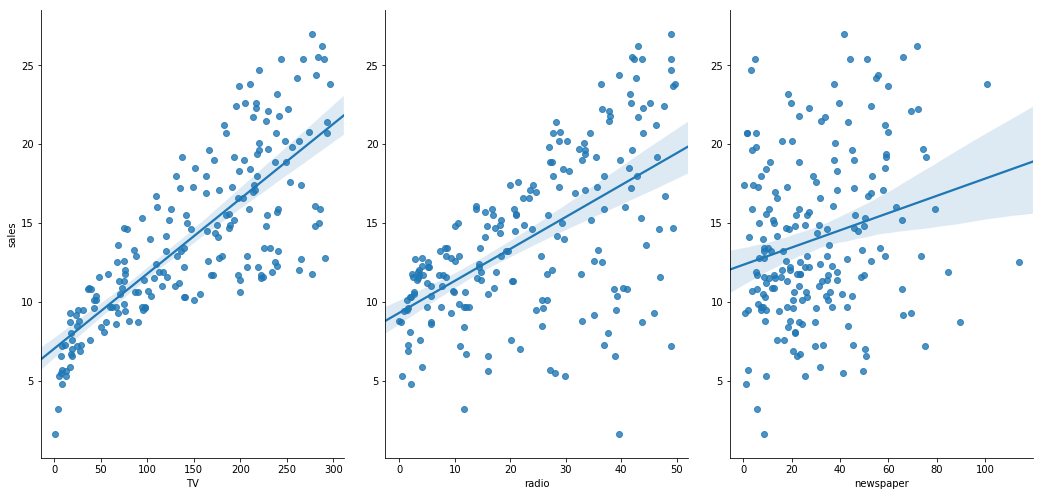

In [9]:
# Let's visualize the data
import seaborn as sns
%matplotlib inline

sns.pairplot(data, x_vars = ['TV', 'radio', 'newspaper'], y_vars = 'sales', size = 7, aspect = 0.7, kind = 'reg')

Let's prepare data for modelling

In [12]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data['sales']

In [13]:
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((150, 3), (50, 3), (150,), (50,))

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Interpreting model coefficients

In [17]:
linreg.intercept_, linreg.coef_

(2.8769666223179318, array([ 0.04656457,  0.17915812,  0.00345046]))

In [20]:
zip(feature_cols, linreg.coef_)

In [21]:
y_pred = linreg.predict(X_test)

Evaluation Metrics

Mean Absolute Error (MAE) = (true - pred)/total observations

Mean Square Error (MSE) = (true - pred)^2/total observations

In [23]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

In [27]:
print ((10+0+20+10)/4)

from sklearn import metrics
metrics.mean_absolute_error(true, pred)

10.0


10.0

In [28]:
print ((10**2+0**2+20**2+10**2)/4)

metrics.mean_squared_error(true, pred)

150.0


150.0

In [31]:
import numpy as np

np.sqrt((10**2+0**2+20**2+10**2)/4), np.sqrt(metrics.mean_squared_error(true, pred))

(12.24744871391589, 12.24744871391589)

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.4046514230328955

Let's try by removing the Newspaper column

In [33]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1.3879034699382888

Better RMSE score.